

 # Sentiment Analysis

In [1]:
# import nltk 
# import random
# import re
# import os
# from nltk.classify.scikitlearn import SklearnClassifier
# from sklearn.linear_model import LogisticRegression 
# from sklearn.linear_model import SGDClassifier

In [2]:
#  Loading Dataset
import pandas as pd

df = pd.read_csv('./Datasets/imdb_reviews.csv')


#  label 0:  negetive  , 1: positive

In [9]:
df.shape[0]

5000

C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

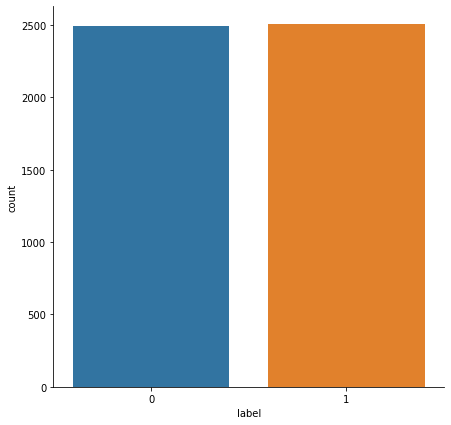

In [10]:
import seaborn as sns

from matplotlib import rcParams

# figure size in inches (width, height)
rcParams['figure.figsize'] = 7,7
#  set up the box on the plot to false
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

col = "label"
sns.countplot(col,data=df)

#  data set is balanced

In [11]:
#  converting data for classifier

all_data = [(i[0],i[1]) for i in df.values]

In [13]:


from nltk.tokenize import RegexpTokenizer

sym_tokenizer = RegexpTokenizer(r'\w+')

wt_s = sym_tokenizer.tokenize(all_data)   

from nltk.corpus import stopwords


available_stopword = stopwords.words('english')


# tokens=[]

# for w in wt_s:  # wt_s  => tokenized words after removing punctuations and symbols
#     if w not in available_stopword:
#         tokens.append(w)

# from nltk.stem import WordNetLemmatizer

# wl = WordNetLemmatizer()

# import nltk

# pos_tagged = nltk.pos_tag(w)

TypeError: expected string or bytes-like object

In [8]:
#  collecting adjectives

allowed_pos = ["JJ" , "JJR" , "JJS" ]      # considering only adjectives

adj = []

for index in range(df.shape[0]):
    tokens = []
#     Tokeninzing and removing symbols
    text = sym_tokenizer.tokenize(df["text"].iloc[index]) 
#     Removing stopwords
    for w in text: 
        if (w not in available_stopword) and (len(w) >1):
            tokens.append(w)
#    lemmitizing
    lemmitised_tokes = []
    for w in tokens:
        lemmitised_tokes.append(wl.lemmatize(w,'v'))
#         Pos tagging
# JJ adjective – ‘big’ 
# JJR adjective, comparative – ‘bigger’ 
# JJS adjective, superlative – ‘biggest’ 
# RB adverb – very, silently, 
    pos_tagged = nltk.pos_tag(lemmitised_tokes)
    pos_tagged_tokens = [] 
    for i in pos_tagged:
        if i[1] in allowed_pos:
            adj.append(i[0])
    
adj = nltk.FreqDist(adj)


    
    

KeyboardInterrupt: 

In [ ]:
considered_features = list(adj.keys())[:5000]    # considering most frequent 2000 words



In [ ]:
def find(doc):
    word= word_tokenize(doc)
    dic = {}
    for w in considered_features:
        dic[w] = (w in word)
    return dic
    

In [ ]:
feature_set = [(find(adjj) , category) for (adjj , category) in all_data]

In [ ]:
feature_set[0]

({'write': False,
  'complete': True,
  'fest': False,
  'tragic': True,
  'remote': True,
  'walk': True,
  'tight': True,
  'couch': True,
  'little': True,
  'broad': True,
  'general': True,
  'objective': True,
  'experiential': True,
  'total': True,
  'comedic': True,
  'attractive': True,
  'real': True,
  'stop': True,
  'local': True,
  'flamethrower': True,
  'wonderful': True,
  'comic': True,
  'sty': True,
  'good': True,
  'funny': True,
  'butt': True,
  'vacant': True,
  'beat': False,
  'chest': True,
  'straw': True,
  'pretty': False,
  'episode': True,
  'intern': False,
  'right': True,
  'hard': False,
  'typical': False,
  'much': False,
  'reveal': False,
  'corporate': False,
  'believe': False,
  'couple': False,
  'till': False,
  'legal': False,
  'happen': False,
  'direct': False,
  'fetch': False,
  'ridiculous': False,
  'older': False,
  'younger': False,
  'wish': False,
  'excellent': False,
  'horrible': False,
  'serious': False,
  'laughable': Fal

In [ ]:
train = feature_set[:int(len(feature_set)*0.8)]
test = feature_set[int(len(feature_set)*0.8):]
len(train) , len(test)

(4000, 1000)

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train)    # format : [({"key" :True/Flase} , "pos/neg")]



In [ ]:
print("Accuracy :" , nltk.classify.accuracy(classifier , test)*100 , "%" )

Accuracy : 83.1 %


In [ ]:
def test_sentiment(text):
    if nltk.NaiveBayesClassifier.classify(classifier ,find(text)) == 0:
        return "Negetive Review"
    else:
        return "Positive Review"


In [ ]:
test_sentiment("it was totally time waste movie , not recommended by me")

'Positive Review'

In [ ]:
test_sentiment("Nice movie , worth the time , good plot")

'Positive Review'

In [ ]:
test_sentiment("poor visuals but nice story")

'Positive Review'

In [ ]:
test_sentiment("poor performance , not at all good movie")

'Positive Review'

In [ ]:
neg = 0
for i in range(len(train)):
    if train[i][1] == 0:
        neg = neg+ 1 
neg , len(train) - neg

(2017, 1983)

In [ ]:
neg = 0
for i in range(len(test)):
    if test[i][1] == 0:
        neg = neg+ 1 
neg , len(test) - neg

(478, 522)